In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from plotnine import *
from scipy.cluster.hierarchy import dendrogram, linkage

# Preliminary Loading and Cleaning

In [26]:
# Load each dataset into a separate DataFrame
sales = pd.read_csv('sales.csv')
features = pd.read_csv('Features data set.csv')
stores = pd.read_csv('stores.csv')
stores = stores.iloc[::,:4]


print(sales.shape)
print(features.shape)
print(stores.shape)



(421570, 5)
(8190, 12)
(45, 4)


In [27]:
# Merging Into One Dataset
data = sales.merge(features, on=['Store', 'Date', 'IsHoliday'], how = 'inner')
data = data.merge(stores, on=['Store'], how='inner')
data.head(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,DMA
0,1,1,5/2/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Houston
1,1,2,5/2/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Houston
2,1,3,5/2/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Houston
3,1,4,5/2/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Houston
4,1,5,5/2/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,Houston


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
 16  DMA           421570 non-null  object 
dtypes: bool(1), float64(10), int64(3), object(3)
mem

In [30]:
# Cleaning Dataset
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)


In [31]:
data.DMA.unique()


array(['Houston', 'Cleveland-Akron', 'Denver', 'Austin',
       'Oralando-Daytona Brach-Melbourne FL', 'San Diego',
       'Dallas-Ft.Worth', 'Los Angeles', 'Chicago', 'Charlotte',
       'Philadelphia', 'Tampa-St. Pete', 'Salt Lake City', 'Atlanta',
       'Kansas City'], dtype=object)

In [32]:
# Reading DMA Info
info = pd.read_csv("DMA_info.csv")
info = info.drop(columns = 'DMA')
info.rename(columns = {'DMA Name':'DMA'}, inplace = True)

info = info.iloc[::,0:9]

In [33]:
# Final Dataset
data = data.merge(info, on=['DMA'], how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431781 entries, 0 to 431780
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            431781 non-null  int64         
 1   Dept             431781 non-null  int64         
 2   Date             431781 non-null  datetime64[ns]
 3   Weekly_Sales     431781 non-null  float64       
 4   IsHoliday        431781 non-null  bool          
 5   Temperature      431781 non-null  float64       
 6   Fuel_Price       431781 non-null  float64       
 7   MarkDown1        154333 non-null  float64       
 8   MarkDown2        114402 non-null  float64       
 9   MarkDown3        140600 non-null  float64       
 10  MarkDown4        138619 non-null  float64       
 11  MarkDown5        155084 non-null  float64       
 12  CPI              431781 non-null  float64       
 13  Unemployment     431781 non-null  float64       
 14  Type             431

In [34]:
# Selecting only important variables
data = data.drop(columns = ['Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size', 'Name', 'Area'])

In [35]:
# Changing Data types
data['Population 18+'] = data['Population 18+'].str.replace(' ','')
data['Population 18+'] = data['Population 18+'].str.replace(',','')
data['Population 18+'] = data['Population 18+'].astype(float)

data['Household Count'] = data['Household Count'].str.replace(' ','')
data['Household Count'] = data['Household Count'].str.replace(',','')
data['Household Count'] = data['Household Count'].astype(float)

data['Med HHld Income'] = data['Med HHld Income'].str.replace(' ','')
data['Med HHld Income'] = data['Med HHld Income'].str.replace(',','')
data['Med HHld Income'] = data['Med HHld Income'].str.replace('$','')
data['Med HHld Income'] = data['Med HHld Income'].astype(float)

<ipython-input-35-1bdd01e6de97>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [36]:
print('Entries in final dataset:',data.shape[0])

Entries in final dataset: 431781


In [37]:
data.DMA.unique()

array(['Houston', 'Cleveland-Akron', 'Denver', 'Austin',
       'Oralando-Daytona Brach-Melbourne FL', 'San Diego',
       'Dallas-Ft.Worth', 'Los Angeles', 'Chicago', 'Charlotte',
       'Philadelphia', 'Tampa-St. Pete', 'Salt Lake City', 'Atlanta',
       'Kansas City'], dtype=object)

In [38]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

Store                  0
Date                   0
Weekly_Sales           0
CPI                    0
Unemployment           0
DMA                    0
Latitude               0
Longitude              0
Country            10211
Population 18+         0
Household Count        0
Med HHld Income        0
dtype: int64
96


In [39]:
# Export this Dataset to a csv file
data.to_csv("market_data.csv", index=False, encoding='utf-8')

# EDA

In [40]:
 # Seeing how many stores each DMA has
compet = pd.DataFrame(data.groupby('DMA')['Store'].nunique())
compet

,Store
DMA,
Atlanta,4
Austin,3
Charlotte,2
Chicago,3
Cleveland-Akron,4
Dallas-Ft.Worth,4
Denver,3
Houston,4
Kansas City,2


In [41]:
data.groupby('DMA').Weekly_Sales.mean().reset_index(name = 'Mean_Weekly_Sales').sort_values(by = 'Mean_Weekly_Sales', ascending=False)

,DMA,Mean_Weekly_Sales
7,Houston,22827.137146
10,Oralando-Daytona Brach-Melbourne FL,21913.243624
14,Tampa-St. Pete,20844.951583
11,Philadelphia,20070.575302
4,Cleveland-Akron,18916.307581
9,Los Angeles,17109.458943
5,Dallas-Ft.Worth,16387.313426
3,Chicago,14769.416865
0,Atlanta,13932.969981
2,Charlotte,13362.127087


In [42]:
data.groupby('DMA').CPI.mean().reset_index(name = 'Mean CPI').sort_values(by = 'Mean CPI', ascending=False)

,DMA,Mean CPI
10,Oralando-Daytona Brach-Melbourne FL,217.564946
12,Salt Lake City,215.322846
13,San Diego,214.689467
14,Tampa-St. Pete,198.004157
1,Austin,187.383561
6,Denver,181.741318
5,Dallas-Ft.Worth,180.671544
8,Kansas City,174.599812
4,Cleveland-Akron,166.286638
9,Los Angeles,164.658084


In [43]:
data.groupby('DMA').Unemployment.mean().reset_index(name = 'Unemployment').sort_values(by = 'Unemployment', ascending=False)

,DMA,Unemployment
3,Chicago,10.252000
8,Kansas City,9.821981
5,Dallas-Ft.Worth,8.700081
4,Cleveland-Akron,8.628799
14,Tampa-St. Pete,7.991073
6,Denver,7.948460
0,Atlanta,7.847162
12,Salt Lake City,7.715172
1,Austin,7.653890
13,San Diego,7.649850


<ipython-input-44-834301902649>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


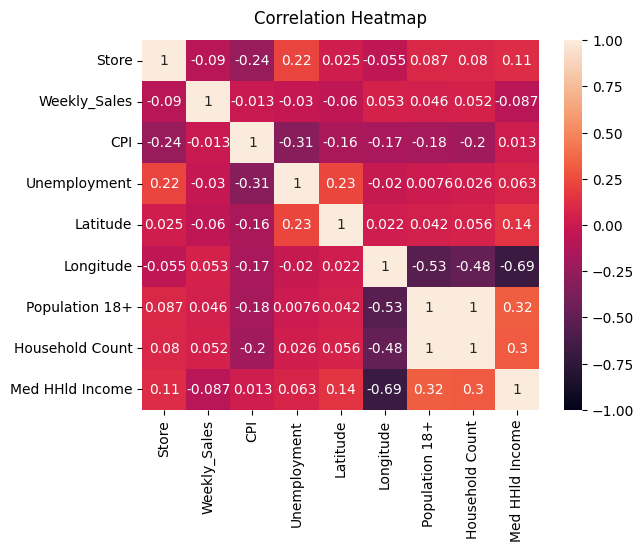

In [44]:
# Correlation HeatMap
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

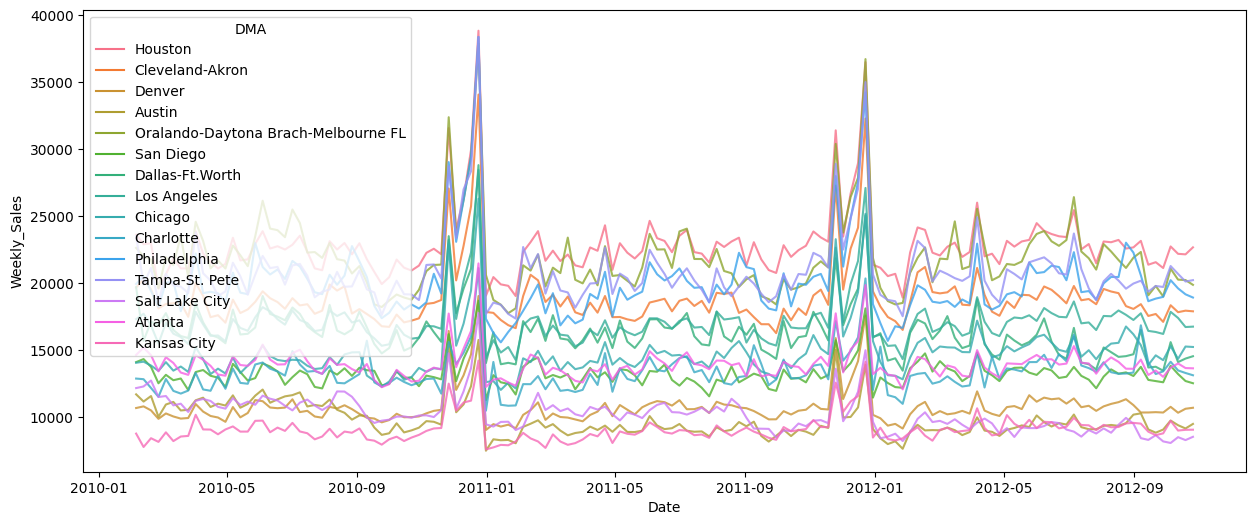

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Weekly_Sales', hue = 'DMA', linewidth=1.5, alpha=0.8, data=data, errorbar=None)
plt.show()

# Clustering


In [46]:
df = pd.read_csv("Market Metrics.csv")
df.head()
df = df.iloc[::,0:7]
df = df.dropna()
df.head()

,DMA,Weekly Sales,Unemployment,CPI,Med Income,Population
0,Atlanta,13932.97,7.85,156.55,62663.0,5262308.0
1,Austin,9761.75,7.65,187.38,71543.0,1742613.0
2,Charlotte,13362.13,5.66,131.93,56357.0,2505561.0
3,Chicago,14769.42,10.25,160.04,69122.0,7362731.0
4,Cleveland-Akron,18916.31,8.63,166.29,54042.0,2962083.0


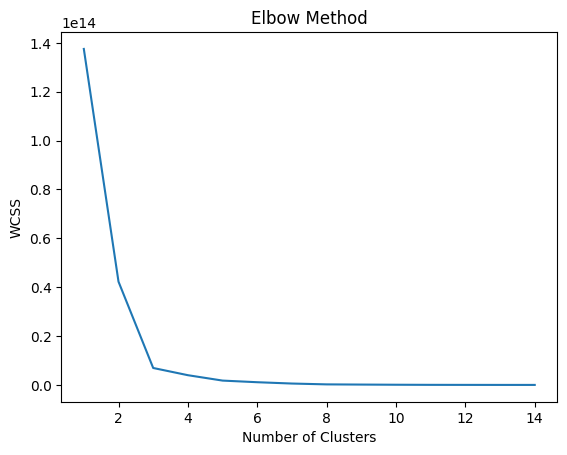

Cluster 0:
                DMA  Population  Med Income  Weekly Sales  Unemployment  \
0           Atlanta   5262308.0     62663.0      13932.97          7.85   
3           Chicago   7362731.0     69122.0      14769.42         10.25   
5   Dallas-Ft.Worth   5922749.0     65788.0      16387.31          8.70   
7           Houston   5322932.0     64432.0      22827.14          7.40   
9       Los Angeles  14004496.0     68945.0      17109.46          7.65   
11     Philadelphia   6295603.0     68438.0      20070.58          6.40   

       CPI  
0   156.55  
3   160.04  
5   180.67  
7   155.90  
9   164.66  
11  135.09  
Cluster 1:
                                    DMA  Population  Med Income  Weekly Sales  \
2                             Charlotte   2505561.0     56357.0      13362.13   
4                       Cleveland-Akron   2962083.0     54042.0      18916.31   
10  Oralando-Daytona Brach-Melbourne FL   3119414.0     51988.5      21913.24   
14                       Tampa-St. Pe

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

In [48]:
features = ['Population', 'Med Income', 'Weekly Sales']

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

clusters = {}
for name, group in df.groupby('DMA'):
    scaler = StandardScaler()
    group_features = scaler.fit_transform(group[features])
    num_clusters = 1
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(group_features)
    group['cluster'] = kmeans.labels_
    clusters[name] = group.iloc[0]  # only include the first row in each cluster

# Concatenate all the groups back together into a single dataframe
clustered_markets = pd.DataFrame(clusters.values())

# Standardize the feature data
scaler = StandardScaler()
market_features = scaler.fit_transform(clustered_markets[features])

# Set the number of clusters you want to create
num_clusters = 3

# Create the KMeans model and fit it to the standardized data
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(market_features)

# Add the cluster labels back to the original dataset
clustered_markets['cluster'] = kmeans.labels_

# Print out the top 10 markets in each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(clustered_markets.loc[clustered_markets['cluster'] == i, ['DMA', 'Population', 'Med Income', 'Weekly Sales', 'Unemployment', 'CPI']].head(10))


In [49]:
silhouette_avg = silhouette_score(market_features, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.42124009046965166


In [50]:
pd.set_option('display.float_format', '{:.2f}'.format)

for i in range(num_clusters):
    print(f"Cluster {i}:")
    cluster = clustered_markets.loc[clustered_markets['cluster'] == i, features]
    print(cluster.mean())

Cluster 0:
Population     7361803.17
Med Income       66564.67
Weekly Sales     17516.15
dtype: float64
Cluster 1:
Population     3115359.25
Med Income       53693.88
Weekly Sales     18759.16
dtype: float64
Cluster 2:
Population     2400243.60
Med Income       69942.40
Weekly Sales     10618.15
dtype: float64
